#HW3 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.3

S0 = np.array([0, 1])
ST = np.array([3, 1])
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]


In [3]:
def choose_action(state,q_table,epsilon):
    prob = rd.random()
    
    if prob < epsilon:
        action = rd.randint(len(ACTIONS))
    else:
        action = rd.choice(np.flatnonzero(q_table[state[0], state[1]] == np.amax(q_table[state[0], state[1]])))
        
    return action

In [4]:
def step(state, action):
    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= 4 or y < 0 or y >= 3:
        next_state = state
    
    x, y = next_state
    if y == 2:
        reward = -100
    else:
        reward = -1

    return next_state, reward

In [5]:
def episode():
    returns = []
    q_table = rd.rand(4, 3, len(ACTIONS))
    q_table[ST[0], ST[1]] = 0
    for i in range(500):
        pair = []
        R = []
        
        state = S0
        while np.any(state != ST):
            action = choose_action(state, q_table, EPSILON)
            next_state, reward = step(state, ACTIONS[action])
            pair.append([state[0], state[1], action])
            R.append(reward)
            state = next_state
        
        G = 0
        visited = []
        for j in range(len(pair)-1, -1, -1):
            G += R[j]
            if pair[j] not in visited:
                visited.append(pair[j])
                x = pair[j][0]
                y = pair[j][1]
                At = pair[j][2]
                q_table[x, y, At] += ALPHA * (G-q_table[x, y, At])
                
        returns.append(G)
    
    return returns, q_table

In [6]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(4):
    for j in range(3):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][2-j])
      if data[i][2-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][2-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][2-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][2-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][2-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][2-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][2-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][2-j][3], verticalalignment='center', horizontalalignment='center')
  # from google.colab import files #google.colab only
  plt.savefig("4.png")
  # files.download("3.png") #google.colab only

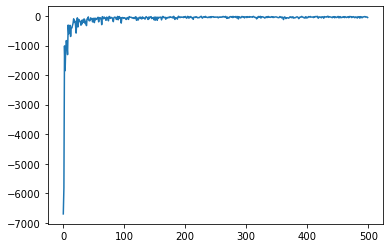

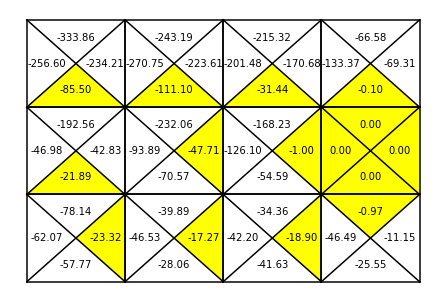

In [7]:
averageReturns = []
averageQ_table = []
for _ in range(30):
    returns, q_table = episode()
    averageReturns.append(returns)
    averageQ_table.append(q_table)
averageReturns = np.mean(averageReturns, axis=0)
averageQ_table = np.mean(averageQ_table, axis=0)
plt.figure()
plt.plot(averageReturns)
plt.savefig("result.png")
plt.show()

drawTable(averageQ_table)